In [1]:
from itertools import combinations

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

In [2]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

# Chapter 05

This chapter introduces the concept of mapping between distributions and graphs. We define and demonstrate basic graphical structures and (briefly) talk about statistical and graphical independence. Finally, we implement regression models to show how different graphical structures manifest themselves in statistical (in)dependencies.

## Visualizations

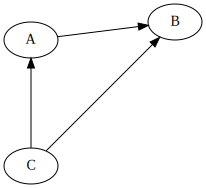

In [3]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,2.75!', '2,3!', '0,1!']

edges = ['AB', 'CB', 'CA']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_markov_01')

graph

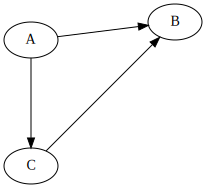

In [4]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,2.75!', '2,3!', '0,1!']

edges = ['AB', 'CB', 'AC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_markov_02')

graph

## Causal graphs and independence

In [5]:
NOISE_LEVEL = .2
N_SAMPLES = 1000

### A chain: `A -> B -> C`

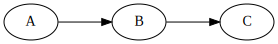

In [6]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['AB', 'BC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_chain_00')

graph

In [7]:
# Generate the data
a = np.random.randn(N_SAMPLES) 
b = a + NOISE_LEVEL*np.random.randn(N_SAMPLES) 
c = b + NOISE_LEVEL*np.random.randn(N_SAMPLES) 

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c)], 2))

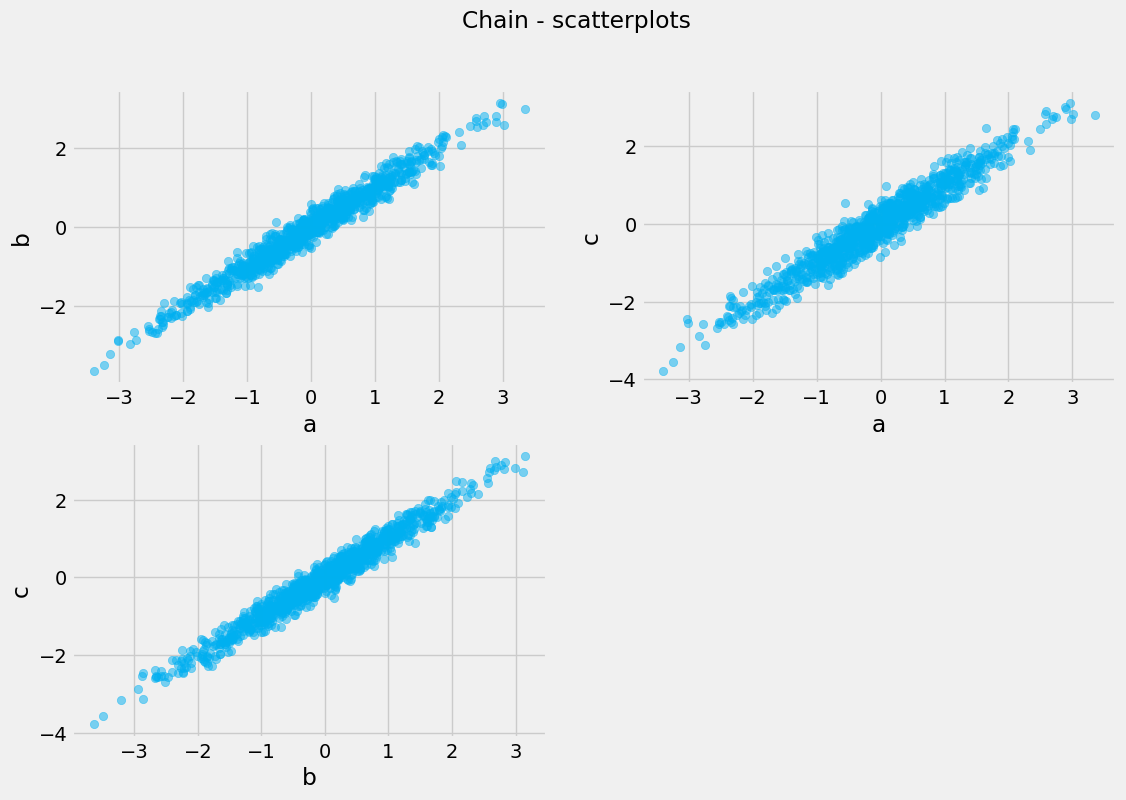

In [8]:
# Plot
plt.figure(figsize=(12, 8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
    
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.suptitle('Chain - scatterplots')
plt.show()

In [9]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.381e+04
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        08:56:54   Log-Likelihood:                 167.99
No. Observations:                1000   AIC:                            -330.0
Df Residuals:                     997   BIC:                            -315.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.006      0.255      0.7

### A fork: `A <- B -> C`

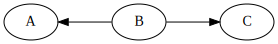

In [10]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['BA', 'BC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_fork_00')

graph

In [11]:
# Generate the data
b = np.random.randn(N_SAMPLES) 
a = b + NOISE_LEVEL*np.random.randn(N_SAMPLES) 
c = b + NOISE_LEVEL*np.random.randn(N_SAMPLES) 

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c)], 2))

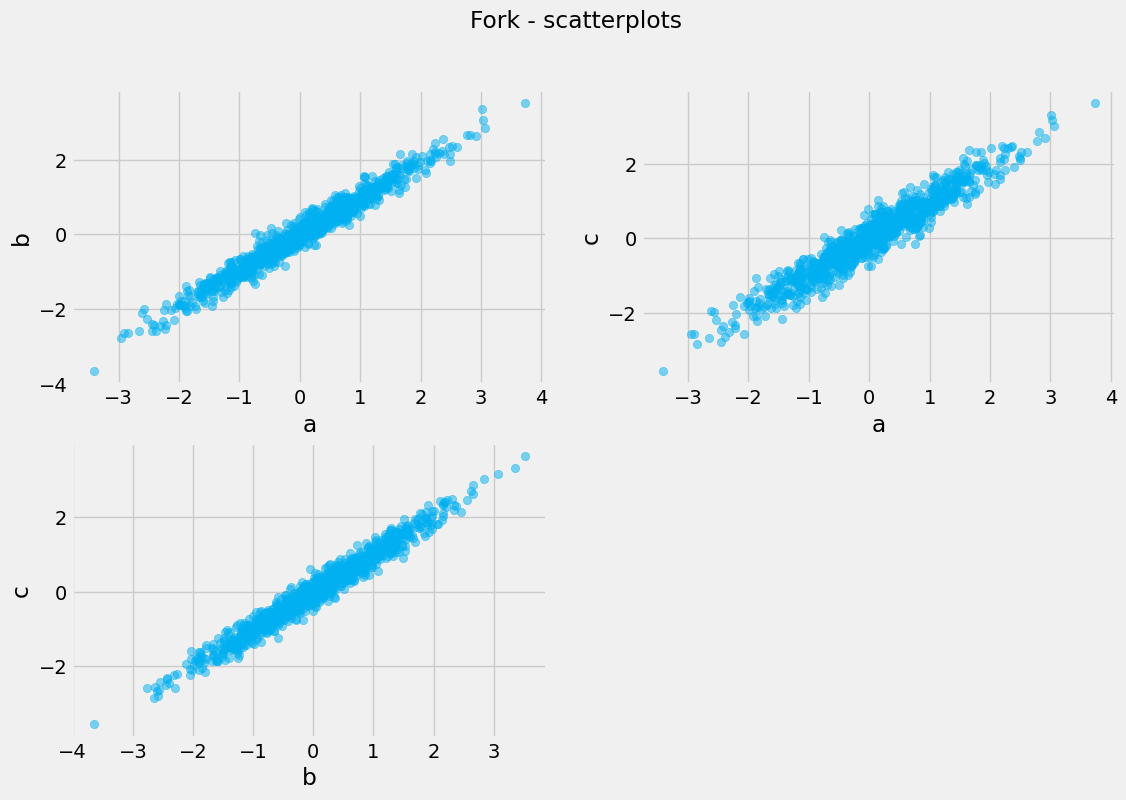

In [12]:
# Plot
plt.figure(figsize=(12, 8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
    
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.suptitle('Fork - scatterplots')
plt.show()

In [13]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.338e+04
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        08:56:55   Log-Likelihood:                 209.43
No. Observations:                1000   AIC:                            -412.9
Df Residuals:                     997   BIC:                            -398.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.006     -0.547      0.5

### A collider: `A -> B <- C`

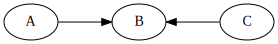

In [14]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['AB', 'CB']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_collider_00')

graph

In [15]:
# Generate the data
a = np.random.randn(N_SAMPLES) 
c = np.random.randn(N_SAMPLES) 
b = a + c + NOISE_LEVEL*np.random.randn(N_SAMPLES) 

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c)], 2))

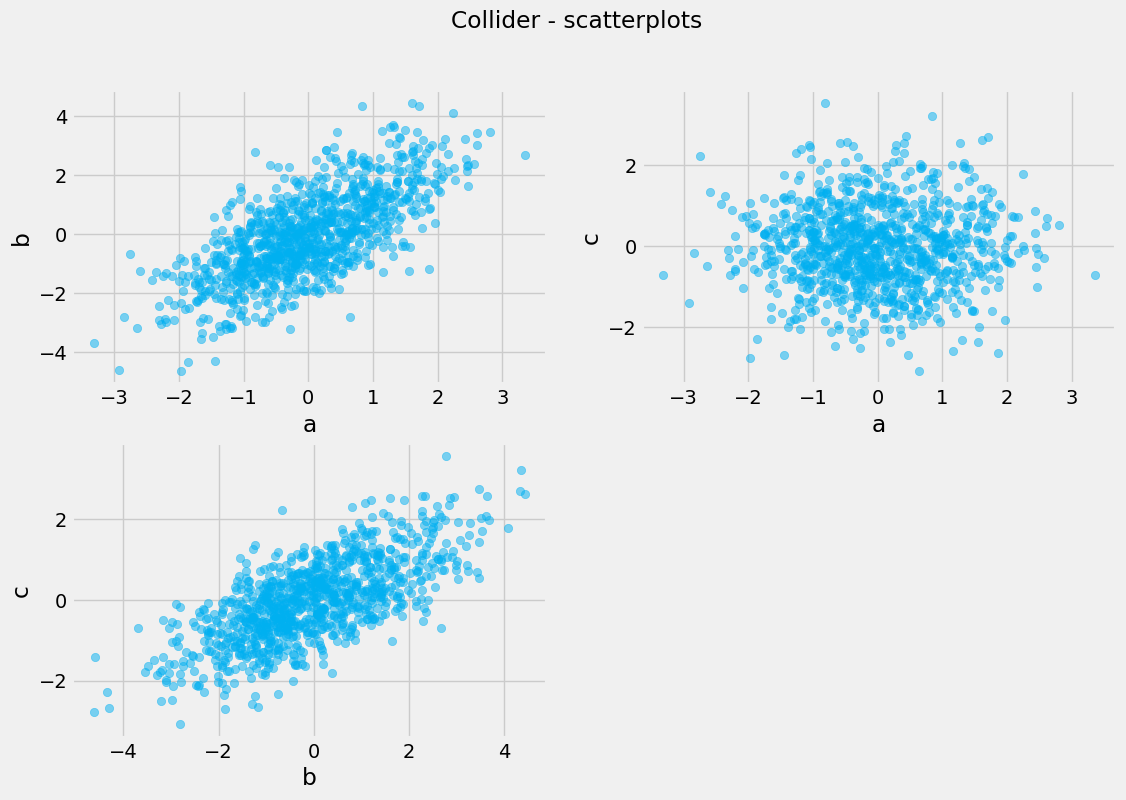

In [16]:
# Plot
plt.figure(figsize=(12, 8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
    
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.suptitle('Collider - scatterplots')
plt.show()

In [17]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        08:56:55   Log-Likelihood:                 218.80
No. Observations:                1000   AIC:                            -431.6
Df Residuals:                     997   BIC:                            -416.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.668e-05      0.006      0.009      0.9